**Cargamos los datos**

In [7]:
import pandas as pd

# Cargar el dataset
datos = pd.read_csv('resultado_combinado.csv')  # Cambia la ruta según tu archivo

# Ver las primeras filas del conjunto de datos
print(datos.head())

         Lat       Long      ID      Name  Lanes         Timestamp   Flow  \
0  34.015325 -118.17127  715947  S OF 710      3  12/01/2023 00:00  165.0   
1  34.015325 -118.17127  715947  S OF 710      3  12/01/2023 00:05  160.0   
2  34.015325 -118.17127  715947  S OF 710      3  12/01/2023 00:10  160.0   
3  34.015325 -118.17127  715947  S OF 710      3  12/01/2023 00:15  154.0   
4  34.015325 -118.17127  715947  S OF 710      3  12/01/2023 00:20  147.0   

      Occ  Speed  Observed  
0  0.0339   69.2       0.0  
1  0.0332   68.9       0.0  
2  0.0331   68.8       0.0  
3  0.0322   68.7       0.0  
4  0.0308   68.6       0.0  


In [8]:
# Convertir la columna 'Timestamp' a datetime
datos['Timestamp'] = pd.to_datetime(datos['Timestamp'])

# Ver las primeras filas del conjunto de datos
print(datos.head())

         Lat       Long      ID      Name  Lanes           Timestamp   Flow  \
0  34.015325 -118.17127  715947  S OF 710      3 2023-12-01 00:00:00  165.0   
1  34.015325 -118.17127  715947  S OF 710      3 2023-12-01 00:05:00  160.0   
2  34.015325 -118.17127  715947  S OF 710      3 2023-12-01 00:10:00  160.0   
3  34.015325 -118.17127  715947  S OF 710      3 2023-12-01 00:15:00  154.0   
4  34.015325 -118.17127  715947  S OF 710      3 2023-12-01 00:20:00  147.0   

      Occ  Speed  Observed  
0  0.0339   69.2       0.0  
1  0.0332   68.9       0.0  
2  0.0331   68.8       0.0  
3  0.0322   68.7       0.0  
4  0.0308   68.6       0.0  


**Nueva dataset con los datos filtrados fecha 11 al 17 de diciembre usando la ID 715947**

In [9]:
# Filtrar los datos entre el 11 y el 17 de diciembre y que tengan la ID 718364
fecha_inicio = '2023-12-11'
fecha_fin = '2023-12-17'
id_filtrada = 718364

datos_filtrados = datos[(datos['Timestamp'] >= fecha_inicio) &
                        (datos['Timestamp'] <= fecha_fin) &
                        (datos['ID'] == id_filtrada)]

# Guardar el nuevo dataset filtrado
datos_filtrados.to_csv('datos_filtrados.csv', index=False)

# Mostrar las primeras filas del nuevo dataset
print(datos_filtrados.head())

               Lat        Long      ID    Name  Lanes           Timestamp  \
1074752  34.002455 -118.151164  718364  GASPAR      4 2023-12-11 00:00:00   
1074753  34.002455 -118.151164  718364  GASPAR      4 2023-12-11 00:05:00   
1074754  34.002455 -118.151164  718364  GASPAR      4 2023-12-11 00:10:00   
1074755  34.002455 -118.151164  718364  GASPAR      4 2023-12-11 00:15:00   
1074756  34.002455 -118.151164  718364  GASPAR      4 2023-12-11 00:20:00   

          Flow     Occ  Speed  Observed  
1074752  189.0  0.0329   68.9     100.0  
1074753  157.0  0.0258   68.4     100.0  
1074754  166.0  0.0282   68.9     100.0  
1074755  141.0  0.0225   69.3     100.0  
1074756  161.0  0.0297   67.1     100.0  


**Preparamos el entorno y cargamos los datos con la nueva dataset**

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Cargar el dataset
datos = pd.read_csv('datos_filtrados.csv')  # Cambia la ruta según tu archivo

# Convertir la columna 'Timestamp' a formato datetime
#datos['Timestamp'] = pd.to_datetime(datos['Timestamp'])

# Filtrar las columnas de interés: Flow, Speed, Occ
datos = datos[['Timestamp', 'Flow', 'Speed', 'Occ']]

# Verificar los primeros datos
print(datos)

                Timestamp   Flow  Speed     Occ
0     2023-12-11 00:00:00  189.0   68.9  0.0329
1     2023-12-11 00:05:00  157.0   68.4  0.0258
2     2023-12-11 00:10:00  166.0   68.9  0.0282
3     2023-12-11 00:15:00  141.0   69.3  0.0225
4     2023-12-11 00:20:00  161.0   67.1  0.0297
...                   ...    ...    ...     ...
1724  2023-12-16 23:40:00  353.0   72.2  0.0621
1725  2023-12-16 23:45:00  326.0   72.7  0.0555
1726  2023-12-16 23:50:00  286.0   73.4  0.0489
1727  2023-12-16 23:55:00  312.0   73.6  0.0535
1728  2023-12-17 00:00:00  317.0   67.8  0.0534

[1729 rows x 4 columns]


**Preprocesamos los datos**

Debemos escalar los datos para que las redes neuronales funcionen mejor.

LSTM tiende a comportarse mejor cuando los datos están normalizados entre 0 y 1.

También dividimos los datos en conjuntos de entrenamiento y prueba.

In [ ]:
# Escalar los datos usando MinMaxScaler (para que los datos estén entre 0 y 1)
#scaler = MinMaxScaler(feature_range=(0, 1))
#scaled_data = scaler.fit_transform(datos[['Flow', 'Speed', 'Occ']])

# Definir cuántos días usaremos como entrada (ej: 7 días anteriores para predecir)
#dias_anteriores = 7

# Crear secuencias de entrenamiento
#x_train, y_train, fechas_train = [], [], []
#for i in range(dias_anteriores, len(scaled_data)):
 #   x_train.append(scaled_data[i-dias_anteriores:i])
  #  y_train.append(scaled_data[i])
  # fechas_train.append(datos['Timestamp'].iloc[i])  # Almacenar la fecha correspondiente

#x_train, y_train, fechas_train = np.array(x_train), np.array(y_train), np.array(fechas_train)

# Dividir el conjunto de datos en conjunto de entrenamiento y prueba
#train_size = int(len(x_train) * 0.8)
#x_test = x_train[train_size:]
#y_test = y_train[train_size:]
#fechas_test = fechas_train[train_size:]

#x_train = x_train[:train_size]
#y_train = y_train[:train_size]
#fechas_train = fechas_train[:train_size]

#print(f'Tamaño del conjunto de entrenamiento: {x_train.shape}, {y_train.shape}')
#print(f'Tamaño del conjunto de prueba: {x_test.shape}, {y_test.shape}')

# Normalizar los datos
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(datos[['Flow', 'Speed', 'Occ']])

# Convertir a DataFrame para visualizar mejor
scaled_df = pd.DataFrame(scaled_data, columns=['Flow', 'Occ', 'Speed'], index=datos.index)

# Función para crear secuencias de datos
def create_sequences(data, sequence_length):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        sequence = data[i:i + sequence_length]
        target = data[i + sequence_length]
        sequences.append(sequence)
        targets.append(target)
    return np.array(sequences), np.array(targets)

# Crear secuencias con longitud de 168 (7 días de datos por intervalos de 1 hora)
sequence_length = 168
X, y = create_sequences(scaled_df.values, sequence_length)

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

**Crear el modelo LSTM**

Creamos un modelo secuencial de Keras con capas LSTM y una capa densa al final para las predicciones.

In [ ]:
# Crear el modelo LSTM
model = Sequential()

# Primera capa LSTM con dropout
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

# Segunda capa LSTM
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Capa densa para salida
model.add(Dense(units=3))  # Salida con 3 neuronas para Flow, Speed, Occ

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


# Evaluar el modelo
#model.evaluate(x_test, y_test)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 9s 158ms/step - loss: 0.1309 - val_loss: 0.0187
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 8s 199ms/step - loss: 0.0199 - val_loss: 0.0147
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 133ms/step - loss: 0.0154 - val_loss: 0.0137
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 12s 164ms/step - loss: 0.0128 - val_loss: 0.0143
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 11s 194ms/step - loss: 0.0118 - val_loss: 0.0131
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 8s 132ms/step - loss: 0.0104 - val_loss: 0.0130
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 8s 216ms/step - loss: 0.0099 - val_loss: 0.0127
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 132ms/step - loss: 0.0093 - val_loss: 0.0128
Epoch 9/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 13s 219ms/step - loss: 0.0093 - val_loss: 0.0125
Epoch 10/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - loss: 0.0089 - val_loss: 0.0128
Epoch 11/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 8s 208ms/step - loss: 0.0087 - val_loss: 0.0139
Epoch 12/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 132ms/step - loss:

**Graficamos la perdida durante el entrenamiento y la validacion**

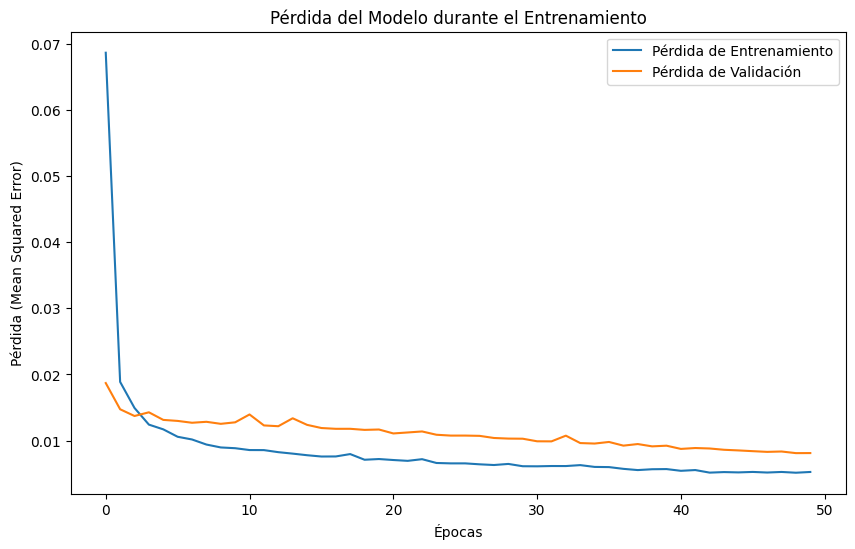

In [ ]:
# Graficar la pérdida (loss) durante el entrenamiento y la validación
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Pérdida del Modelo durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida (Mean Squared Error)')
plt.legend()
plt.show()

**Predecimos**

In [ ]:
# Hacer predicciones
predictions = model.predict(X_test)

# Desnormalizar los datos para obtener los valores originales
y_test_rescaled = scaler.inverse_transform(y_test)
predictions_rescaled = scaler.inverse_transform(predictions)

print(predictions_rescaled)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step
[[3.90455231e+02 3.22448006e+01 2.24416018e-01]
 [3.83681671e+02 3.10933304e+01 2.31232151e-01]
 [3.82597076e+02 3.15935497e+01 2.29655609e-01]
 [3.84770782e+02 3.17364407e+01 2.28470504e-01]
 [3.85946289e+02 3.15491123e+01 2.28582308e-01]
 [3.90773071e+02 3.39320831e+01 2.16478944e-01]
 [3.99496948e+02 3.61741219e+01 2.03514069e-01]
 [4.14601318e+02 4.05631142e+01 1.80684477e-01]
 [4.27854553e+02 4.48083382e+01 1.57936618e-01]
 [4.29606567e+02 5.27663422e+01 1.20902881e-01]
 [4.24182190e+02 5.55061493e+01 1.05485596e-01]
 [4.13703796e+02 4.88640175e+01 1.30603179e-01]
 [3.92843353e+02 4.24015923e+01 1.59156799e-01]
 [3.60752075e+02 3.29955330e+01 2.06132486e-01]
 [3.24593719e+02 2.34294872e+01 2.63768464e-01]
 [2.82154755e+02 1.51362219e+01 3.26416016e-01]
 [2.38848389e+02 6.94694519e+00 3.99310619e-01]
 [1.99933960e+02 4.17472553e+00 4.43630964e-01]
 [1.80715683e+02 7.37439060e+00 4.45988536e-01]
 [1.89594391e+02 1.48099995e+01 4.12579566e-01]


**Visualizamos las predicciones**

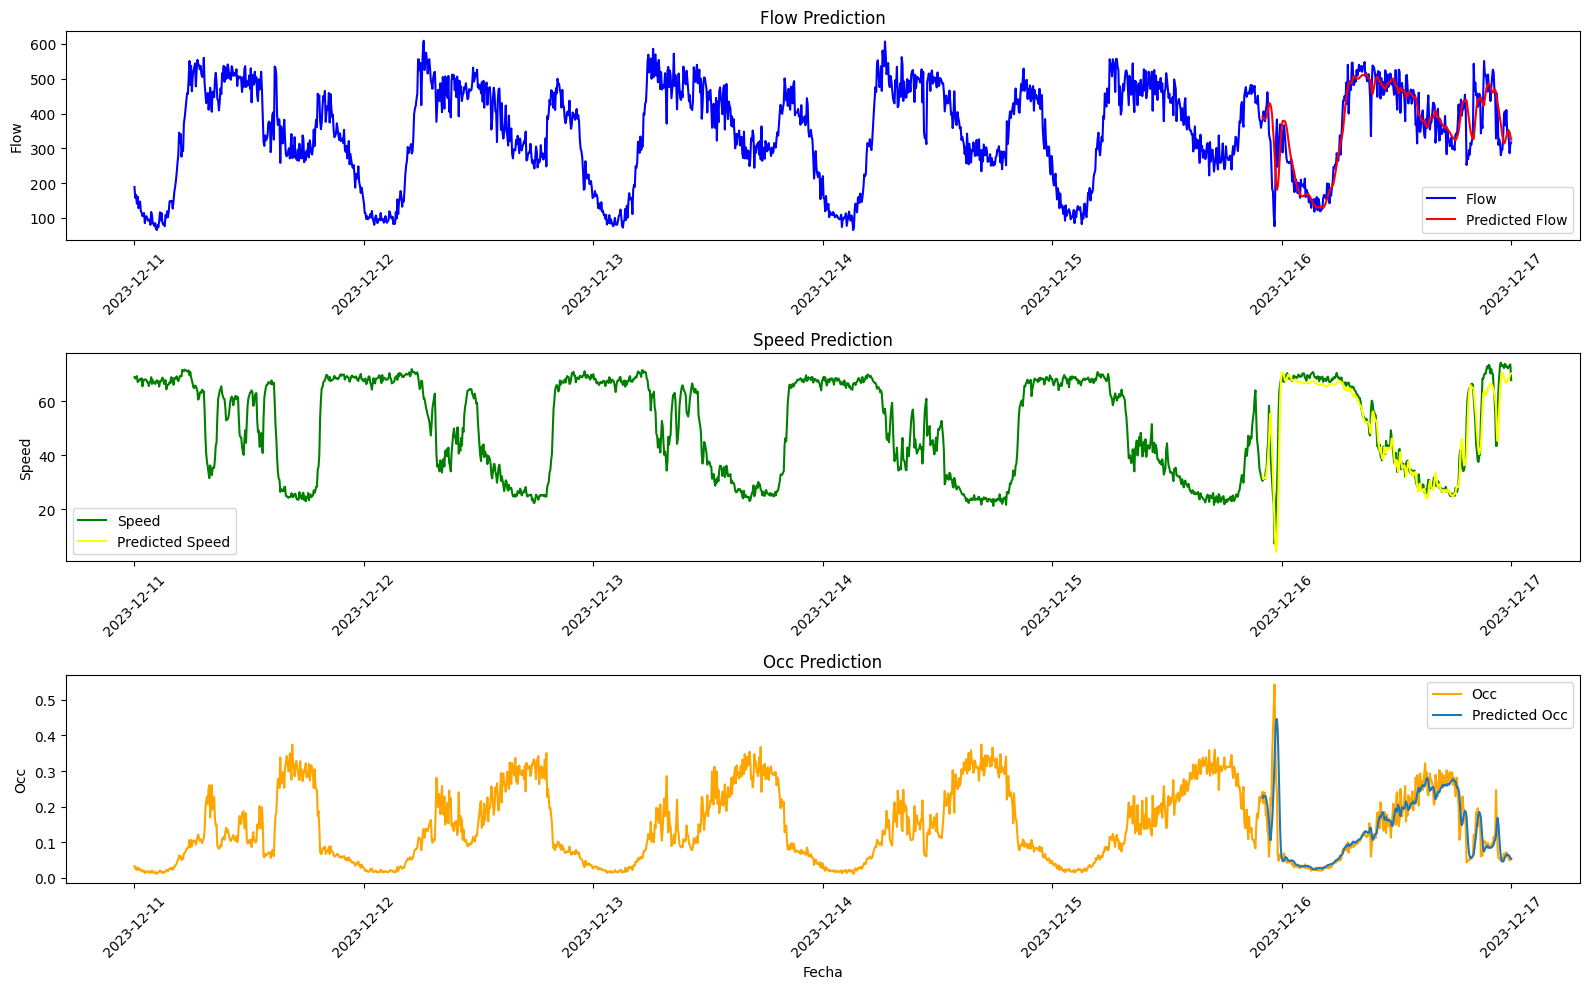

In [ ]:
import matplotlib.pyplot as plt

dates_test = datos['Timestamp'].iloc[-len(y_test):]

# Crear un gráfico de líneas más grande para Flow, Speed y Occ
plt.figure(figsize=(16, 10))  # Aumenta el tamaño del gráfico

# Gráfico de Flow
plt.subplot(3, 1, 1)
plt.plot(datos['Timestamp'], datos['Flow'], color='blue', label='Flow')
plt.plot(dates_test, predictions_rescaled[:, 0], label='Predicted Flow', color='red')  # Predicciones
plt.title('Flow Prediction')
plt.ylabel('Flow')
plt.xticks(rotation=45)
plt.legend()

# Gráfico de Speed
plt.subplot(3, 1, 2)
plt.plot(datos['Timestamp'], datos['Speed'], color='green', label='Speed')
plt.plot(dates_test, predictions_rescaled[:, 1], label='Predicted Speed', color='yellow')  # Predicciones
plt.title('Speed Prediction')
plt.ylabel('Speed')
plt.xticks(rotation=45)
plt.legend()

# Gráfico de Occ
plt.subplot(3, 1, 3)
plt.plot(datos['Timestamp'], datos['Occ'], color='orange', label='Occ')
plt.plot(dates_test, predictions_rescaled[:, 2], label='Predicted Occ')  # Predicciones
plt.title('Occ Prediction')
plt.ylabel('Occ')
plt.xlabel('Fecha')
plt.xticks(rotation=45)
plt.legend()

# Ajustar el espacio entre gráficos
plt.tight_layout()
plt.show()

**Grafico de prediccion por cada 3 horas**

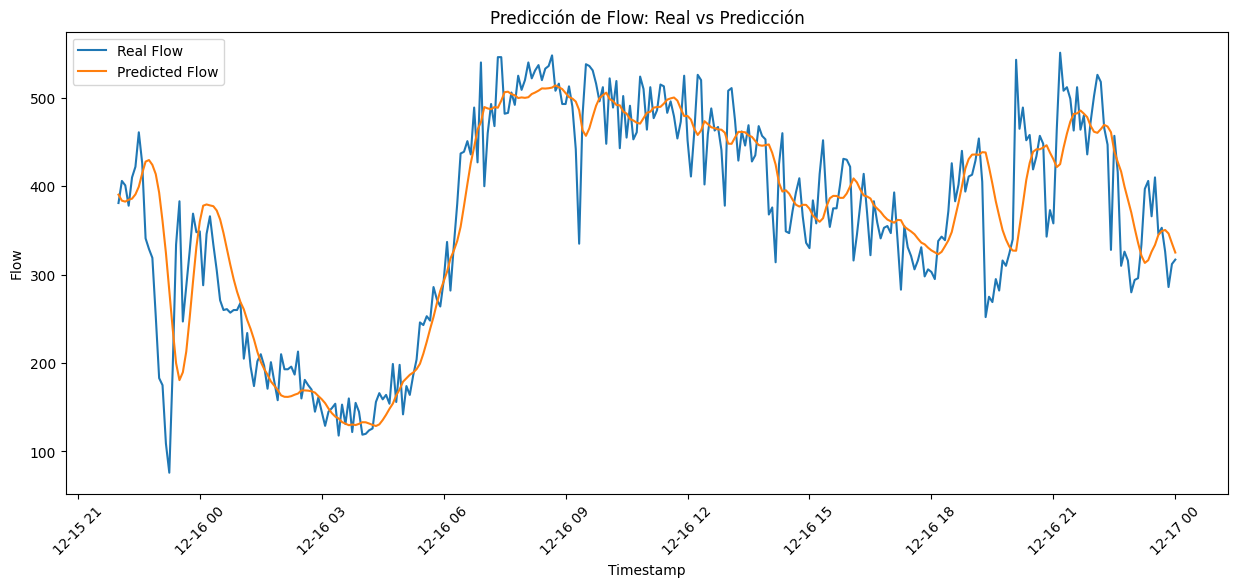

In [ ]:
import matplotlib.pyplot as plt

# Recortamos las fechas al tamaño de los datos de prueba (y_test)
dates_test = datos['Timestamp'].iloc[-len(y_test):]

# Graficar
plt.figure(figsize=(15,6))

# FLOW
plt.plot(dates_test, y_test_rescaled[:, 0], label='Real Flow')  # Valores reales
plt.plot(dates_test, predictions_rescaled[:, 0], label='Predicted Flow')  # Predicciones

# Formato de la fecha en el eje X
plt.xticks(rotation=45)  # Rota las etiquetas del eje X para que se vean mejor
plt.xlabel('Timestamp')  # Etiqueta del eje X
plt.ylabel('Flow')  # Etiqueta del eje Y
plt.title('Predicción de Flow: Real vs Predicción')  # Título del gráfico
plt.legend()

plt.show()

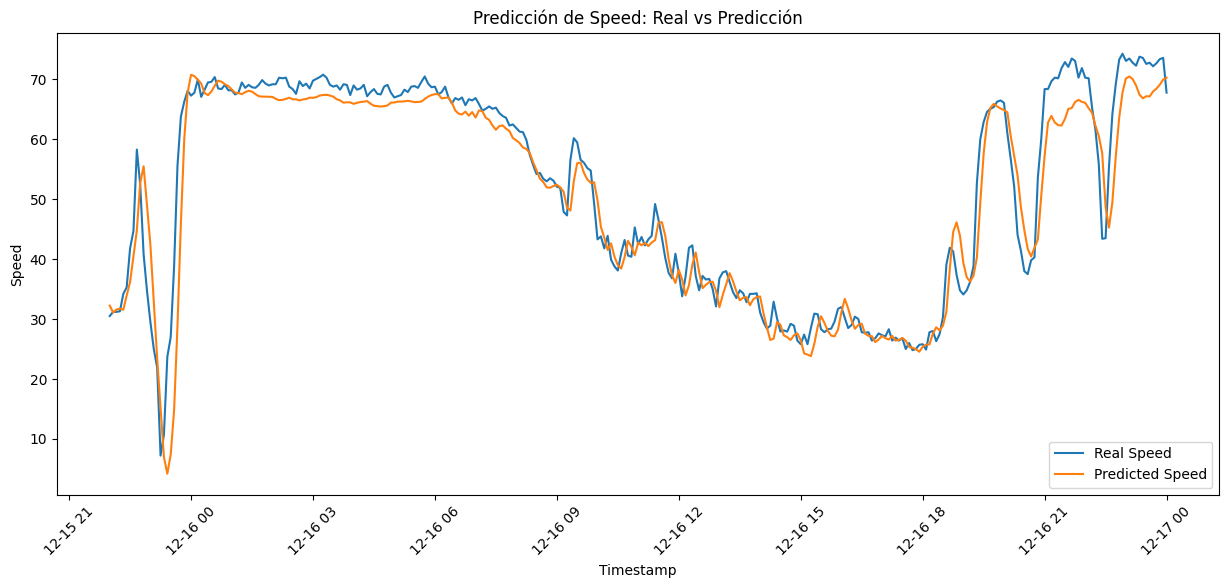

In [ ]:
import matplotlib.pyplot as plt

# Recortamos las fechas al tamaño de los datos de prueba (y_test)
dates_test = datos['Timestamp'].iloc[-len(y_test):]

# Graficar
plt.figure(figsize=(15,6))

# FLOW
plt.plot(dates_test, y_test_rescaled[:, 1], label='Real Speed')  # Valores reales
plt.plot(dates_test, predictions_rescaled[:, 1], label='Predicted Speed')  # Predicciones

# Formato de la fecha en el eje X
plt.xticks(rotation=45)  # Rota las etiquetas del eje X para que se vean mejor
plt.xlabel('Timestamp')  # Etiqueta del eje X
plt.ylabel('Speed')  # Etiqueta del eje Y
plt.title('Predicción de Speed: Real vs Predicción')  # Título del gráfico
plt.legend()

plt.show()

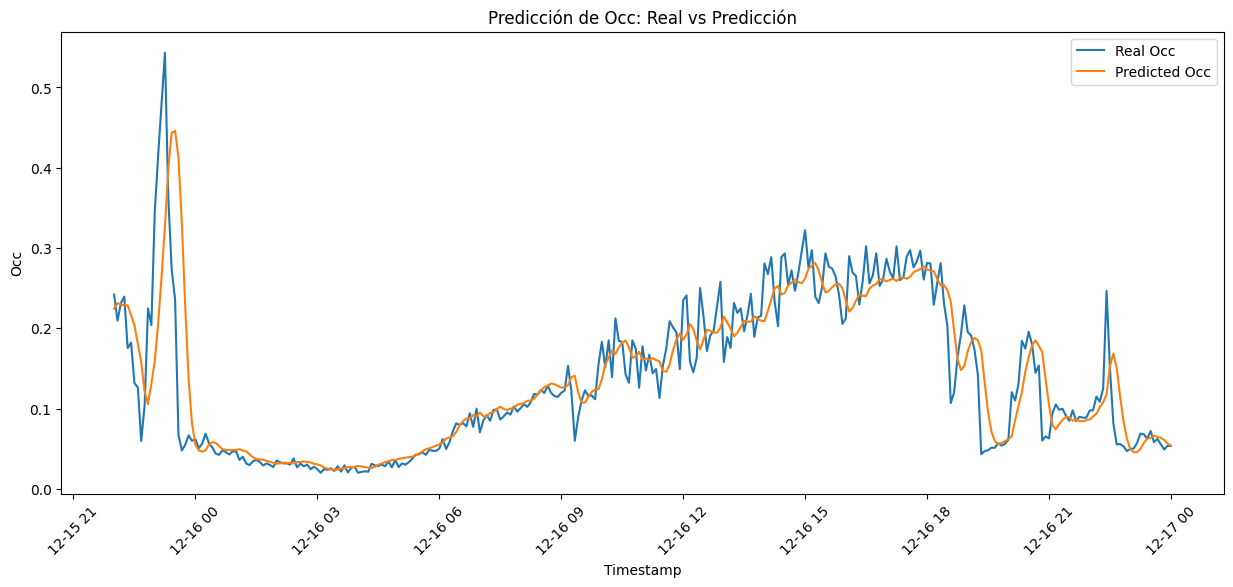

In [ ]:
import matplotlib.pyplot as plt

# Recortamos las fechas al tamaño de los datos de prueba (y_test)
dates_test = datos['Timestamp'].iloc[-len(y_test):]

# Graficar
plt.figure(figsize=(15,6))

# FLOW
plt.plot(dates_test, y_test_rescaled[:, 2], label='Real Occ')  # Valores reales
plt.plot(dates_test, predictions_rescaled[:, 2], label='Predicted Occ')  # Predicciones

# Formato de la fecha en el eje X
plt.xticks(rotation=45)  # Rota las etiquetas del eje X para que se vean mejor
plt.xlabel('Timestamp')  # Etiqueta del eje X
plt.ylabel('Occ')  # Etiqueta del eje Y
plt.title('Predicción de Occ: Real vs Predicción')  # Título del gráfico
plt.legend()

plt.show()

**Métricas de Rendimiento**

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = model.predict(X_test)

# Cálculo de métricas adicionales
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados de métricas
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")

# Definir la función para calcular SMAPE
def smape(y_true, y_pred):
    denominator = np.abs(y_true) + np.abs(y_pred)
    diff = np.abs(y_true - y_pred) / denominator
    return 100 * np.mean(diff[denominator != 0])  # Ignorar denominadores cero

# Asegúrate de que y_test y y_pred estén en el mismo formato y escalados si es necesario
smape_value = smape(y_test, y_pred)
print(f'SMAPE: {smape_value}')

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step
MSE: 0.008100400217598072
RMSE: 0.09000222340363638
MAE: 0.05588339895241869
R²: 0.8124803128222092
SMAPE: 7.90366739347943


**Guardado del modelo**

In [ ]:
# Guardar el modelo completo en un archivo .h5
model.save('modelo_lstm_trafico.h5')